###K-M Curve

+ non parameteric method:
  + Life table
  + Kaplan-Meier
  + Log rank test (比較兩組之間的存活時間)



####Life Table


Ex: 6 *, 6, 6, 6, 7, 9 *, 10 *, 10, 11 *, 13, 16, 17 *, 19 *, 20 *, 22, 23, 25 *

Hint: 拿到資料要先排序，由小到大。

|Time period|# at risk ($n_j$)|# of death ($d_j$)|Hazard ratio ($\frac{d_j}{n_j}$)|1 - $\frac{d_j}{n_j}$|
|:-:|:-:|:-:|:-:|:-:|
|[0, 1)|17|0|0/17 = 0|1|
|[1, 2)|17|0|0/17 = 0|1|
|[2, 3)|17|0|0/17 = 0|1|
|[3, 4)|17|0|0/17 = 0|1|
|[4, 5)|17|0|0/17 = 0|1|
|[5, 6)|17|0|0/17 = 0|1|
|[6, 7)|17|3|3/17|14/17|
|[7, 8)|13|1|1/14|13/14|
|[8, 9)|13|0|0|1|
|[9, 10)|12|0|0|1|
|[10, 11)|12|1|1/12|11/12|
|[11, 12)|10|0|0|1|
|[12, 13)|9|0|0|1|
|[13, 14)|8|1|1/8|7/8|
|...|...|...|...||
|[25, 26)|1|0|0|1|

####無母數方法：KM Curve

+ Estimate of Survival function:
  + Note that $S(t) = P(T > t) = P(still\,\, alive\,\, at\,\, time\,\, t)$
  + This estimator only changes at failures times.
  + It is called Kaplan-Meier curve (K-M Curve).

$$
\hat{S}(t) = \prod_{j|t_j\leq t}\left(1 - \frac{d_j}{n_j}\right)
$$

+ Survival data without censorings, the survival curve is estimated by 
 + $\hat{S}(t) = \frac{number \, of \, individuals \, with \, survival \, time \, > \, t}{total \, number \, of \, individuals}$


+ However, K-M proposed the following ways to construct the survival curve when the
censored is present
  + $\hat{S}(t) = \prod_{j|t_j \leq t}(1 - \frac{d_j}{n_j})$, where $0 = t_0 < t_1 < ... < t_k$

+ 又稱為 product limit estimate
  + $\hat{S}(t) = \hat{P}(T > t) = \hat{P}(T > t | T > t_i)\hat{P}(T > t_i), \,\, t > t_i$
  + Ex: $P(T > 5) = P(T > 4)P(T > 5 | T > 4) = ....$

+ So we obtain this product limit estimate
  + $\hat{S}(t) = \prod_{j|t_j < \leq t}(1 - \frac{d_j}{n_j})$, where $0 = t_0 < t_1 < ... < t_k$

Ex: data = {3, 4+, 5.7+, 6.5, 6.5, 8.4+, 10, 10+, 12, 15}

|t|$n_j$|$d_j$|1 - $\frac{d_j}{n_j}$|$\hat{S}(t)$|Note|
|:-:|:-:|:-:|:-:|:-:|:-:|
|3|10|1|9/10|9/10||
|6.5|7|2|5/7|(9/10)(5/7)|ps1|
|10|4|1|3/4|(9/10)(5/7)(3/4)||
|12|2|1|1/2|(9/10)(5/7)(3/4)(1/2)||
|15|1|1|0|0||


+ ps1: $\hat{S}(6.5) = \hat{P}(T > 6.5)$


Ex: No censoring data = {3, 4, 5.7, 6.5, 6.5, 8.4, 10, 10, 12, 15}

|t|$n_j$|$d_j$|1 - $\frac{d_j}{n_j}$|$\hat{S}(t)$|Note|
|:-:|:-:|:-:|:-:|:-:|:-:|
|3|10|1|9/10|9/10||
|4|9|1|8/9|(9/10)(8/9)||
|5.7|8|1|7/8|(9/10)(8/9)(7/8)||
|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$||


+ Variace of KM Curve
  + Greenwood's formula:
  + $Var(\hat{S}(t)) = \hat{S}(t)^2\sum_{j|t_j \leq t} \frac{h_j}{n_j (1 - h_j)}$
  + $h_j$ means hazard ratio.

+ Two types of estimated cumulative hazard function:
  + $\Lambda(t) = -log(\hat{S}(t))$, where $\hat{S}(t)$ is the K-M curve estimator
    + Because of the relationship between $S(t) = exp(-\Lambda(t))$ 
  + Nelson-Aalen estimator: $\sum_{j|t_j \leq t}\frac{d_j}{n_j}$


In [1]:
install.packages("KMsurv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(survival)
library(KMsurv)

In [3]:
data(leukemia)

Warning message in data(leukemia):
“data set ‘leukemia’ not found”


In [4]:
print(leukemia)

   time status             x
1     9      1    Maintained
2    13      1    Maintained
3    13      0    Maintained
4    18      1    Maintained
5    23      1    Maintained
6    28      0    Maintained
7    31      1    Maintained
8    34      1    Maintained
9    45      0    Maintained
10   48      1    Maintained
11  161      0    Maintained
12    5      1 Nonmaintained
13    5      1 Nonmaintained
14    8      1 Nonmaintained
15    8      1 Nonmaintained
16   12      1 Nonmaintained
17   16      0 Nonmaintained
18   23      1 Nonmaintained
19   27      1 Nonmaintained
20   30      1 Nonmaintained
21   33      1 Nonmaintained
22   43      1 Nonmaintained
23   45      1 Nonmaintained


In [5]:
kmfit = survfit(Surv(time, status) ~ 1, data = leukemia, type = "kaplan-meier")
summary(kmfit)

Call: survfit(formula = Surv(time, status) ~ 1, data = leukemia, type = "kaplan-meier")

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    5     23       2   0.9130  0.0588       0.8049        1.000
    8     21       2   0.8261  0.0790       0.6848        0.996
    9     19       1   0.7826  0.0860       0.6310        0.971
   12     18       1   0.7391  0.0916       0.5798        0.942
   13     17       1   0.6957  0.0959       0.5309        0.912
   18     14       1   0.6460  0.1011       0.4753        0.878
   23     13       2   0.5466  0.1073       0.3721        0.803
   27     11       1   0.4969  0.1084       0.3240        0.762
   30      9       1   0.4417  0.1095       0.2717        0.718
   31      8       1   0.3865  0.1089       0.2225        0.671
   33      7       1   0.3313  0.1064       0.1765        0.622
   34      6       1   0.2761  0.1020       0.1338        0.569
   43      5       1   0.2208  0.0954       0.0947        0.515
   45      4   

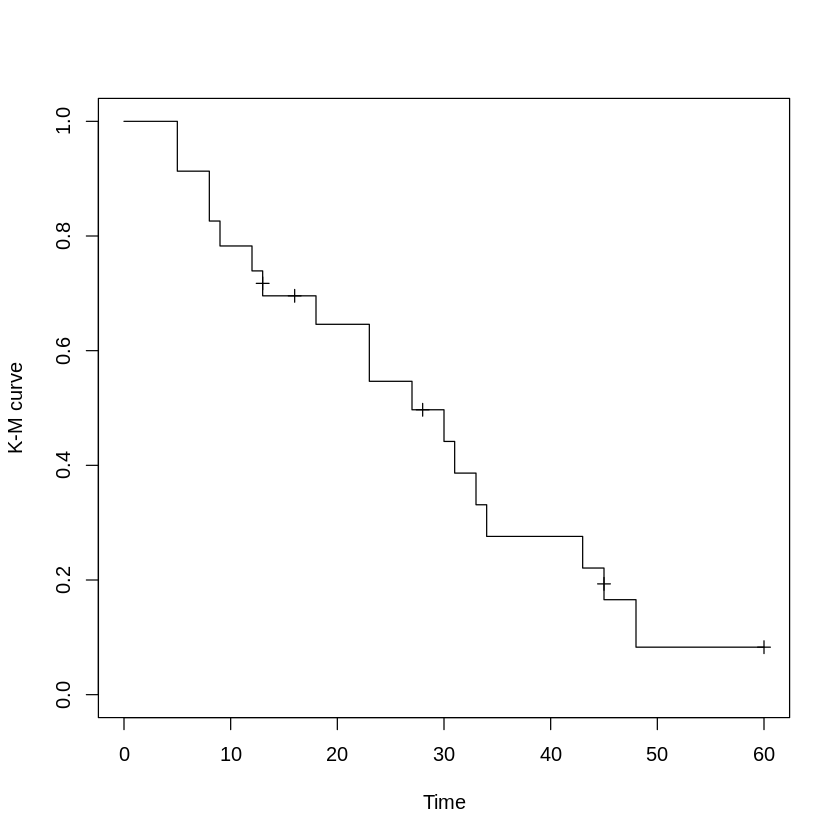

In [6]:
plot(kmfit, conf.int = F, mark.time = T, xlab = "Time", ylab = "K-M curve", xlim = c(0, 60)) 

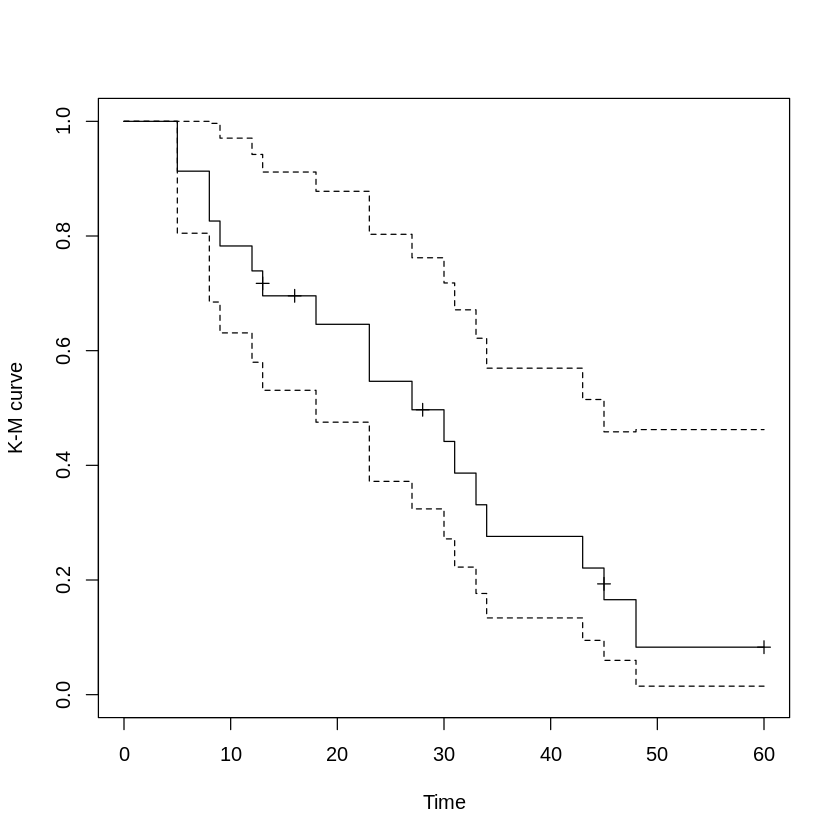

In [7]:
plot(kmfit, conf.int = T, mark.time = T, xlab = "Time", ylab = "K-M curve", xlim = c(0, 60))

In [8]:
leuke1 = leukemia[c(1:11), ]
leuke2 = leukemia[-c(1:11), ]

In [9]:
kmfit1 = survfit(Surv(time, status) ~ 1, data = leuke1, type = "kaplan-meier")
summary(kmfit1)

Call: survfit(formula = Surv(time, status) ~ 1, data = leuke1, type = "kaplan-meier")

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    9     11       1    0.909  0.0867       0.7541        1.000
   13     10       1    0.818  0.1163       0.6192        1.000
   18      8       1    0.716  0.1397       0.4884        1.000
   23      7       1    0.614  0.1526       0.3769        0.999
   31      5       1    0.491  0.1642       0.2549        0.946
   34      4       1    0.368  0.1627       0.1549        0.875
   48      2       1    0.184  0.1535       0.0359        0.944

In [10]:
kmfit2 = survfit(Surv(time, status) ~ 1, data = leuke2, type = "kaplan-meier")
summary(kmfit2)

Call: survfit(formula = Surv(time, status) ~ 1, data = leuke2, type = "kaplan-meier")

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    5     12       2   0.8333  0.1076       0.6470        1.000
    8     10       2   0.6667  0.1361       0.4468        0.995
   12      8       1   0.5833  0.1423       0.3616        0.941
   23      6       1   0.4861  0.1481       0.2675        0.883
   27      5       1   0.3889  0.1470       0.1854        0.816
   30      4       1   0.2917  0.1387       0.1148        0.741
   33      3       1   0.1944  0.1219       0.0569        0.664
   43      2       1   0.0972  0.0919       0.0153        0.620
   45      1       1   0.0000     NaN           NA           NA

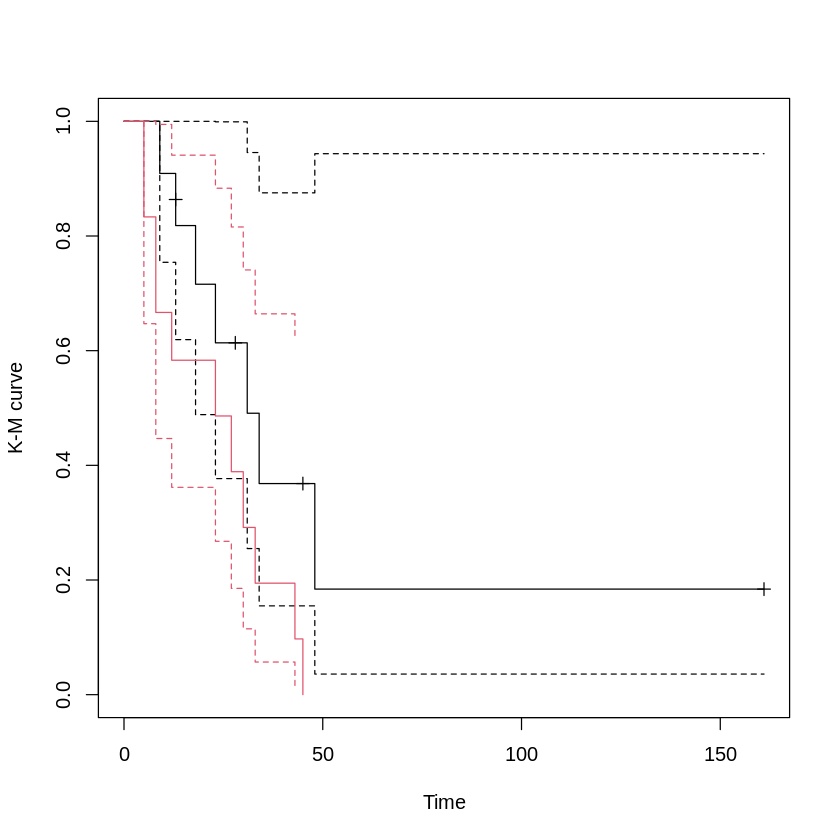

In [11]:
plot(kmfit1, conf.int = T, mark.time = T, xlab = "Time", ylab = "K-M curve") 
lines(kmfit2, col = 2, conf.int = T)

In [20]:
kmfit.x = survfit(Surv(time, status) ~ x, data = leukemia, type = "kaplan-meier")
summary(kmfit.x)

Call: survfit(formula = Surv(time, status) ~ x, data = leukemia, type = "kaplan-meier")

                x=Maintained 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    9     11       1    0.909  0.0867       0.7541        1.000
   13     10       1    0.818  0.1163       0.6192        1.000
   18      8       1    0.716  0.1397       0.4884        1.000
   23      7       1    0.614  0.1526       0.3769        0.999
   31      5       1    0.491  0.1642       0.2549        0.946
   34      4       1    0.368  0.1627       0.1549        0.875
   48      2       1    0.184  0.1535       0.0359        0.944

                x=Nonmaintained 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    5     12       2   0.8333  0.1076       0.6470        1.000
    8     10       2   0.6667  0.1361       0.4468        0.995
   12      8       1   0.5833  0.1423       0.3616        0.941
   23      6       1   0.4861  0.1481       0.2675        0.883
   27      5   

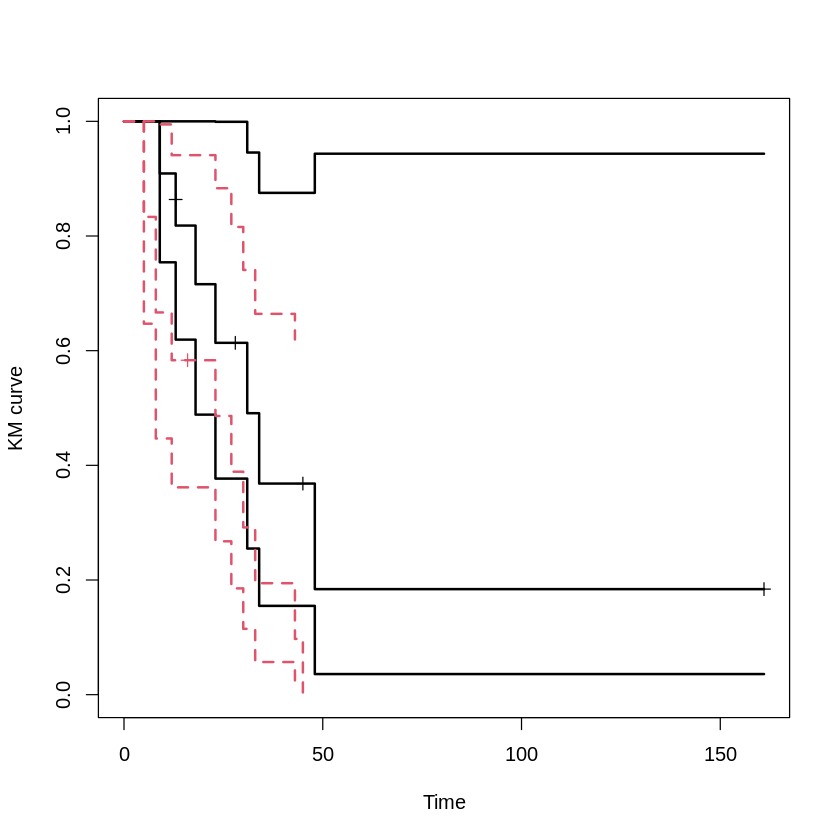

In [22]:
plot(kmfit.x, conf.int = T, mark.time = T, xlab = "Time", ylab = "KM curve", col = c(1, 2), lty = c(1, 2), lwd = c(2, 2))

In [12]:
# t
print(summary(kmfit)$time)

 [1]  5  8  9 12 13 18 23 27 30 31 33 34 43 45 48


In [13]:
# n_j
print(summary(kmfit)$n.risk)

 [1] 23 21 19 18 17 14 13 11  9  8  7  6  5  4  2


In [14]:
# d_j
print(summary(kmfit)$n.event)

 [1] 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1


In [15]:
# Greenwood var
print(summary(kmfit)$std.err^2)

 [1] 0.003451960 0.006246404 0.007397058 0.008383332 0.009205227 0.010229841
 [7] 0.011502700 0.011750946 0.011994208 0.011850239 0.011319039 0.010400609
[13] 0.009094948 0.007402057 0.005279737


#### Log-rank test

+ Mantel-Haenszel test / two-sample test
+ $H_0:S_1(t) = S_2(t)\,\, vs \,\, H_1:S_1(t) \neq S_2(t)$
+ Step1: sort the failure times $t_1 < t_2 < ... < t_k$
+ Step2: find the table at $t_l, \, l = 1, 2, ..., k$

||# of death|# of {T>$t_l$}|# of at risk|
|:-:|:-:|:-:|:-:|
|Group1|1|3 = 1 - 2|2|
|Group2|1'|3' = 1' - 2'|2'|
||$d_l$(邊際和)||$n_l$(邊際和)|

+ 格子內代表計算順序
+ 有幾個failure time，就有幾個此表

Ex: **算沒有censoring的data**

|Data||
|:-|:-|
|Control|15,38,40+,55,65,80+,90,140|
|Treatment|25,50,150+,155|

|t=15|# of deaths|# of {T>$t_l$}|# of at risk|
|:-|:-|:-|:-|
|Control|1|7|8|
|Treatment|0|4|4|
||1||12|

+ $(1 - \frac{1\times ?}{?})$ = $(1 - \frac{1\times 8}{12})$
+ the 1 before the minux is the number of death (control)
+ $1 \times \frac{8}{12}$ is the expected value

|t=25|# of deaths|# of {T>$t_l$}|# of at risk|
|:-|:-|:-|:-|
|Control|0|7|7|
|Treatment|1|3|4|
||1||11|

+ $(0 - \frac{1\times ?}{?})$ = $(0 - \frac{1\times 7}{11})$
+ the 0 before the minux is the number of death (control)
+ $1 \times \frac{7}{11}$ is the expected value

+ Let $E_{ij} = d_j \times \frac{n_{ij}}{n_j}$
+ $V^2_{1j} = Var(E_{1j}) = d_j \times \frac{n_{1j}n_{2j}(n_j - d_j)}{n_j^2(n_j - 1)}$
+ Log-rank test = $\frac{(\sum(d_{1j} - E_{1j}))^2}{\sum v^2_{1j}}\sim \chi_1^2$   (只有分子要平方)

**Step**

1. Let maintained = Group1, nonmaintained = Group2.
2. Let maintained = Group2, nonmaintained = Group1.
3. calculate test的分母。

In [16]:
leukemia_maintained = leukemia[leukemia$x == "Maintained", ]
leukemia_nonmaintained = leukemia[leukemia$x == "Nonmaintained", ]

death_time = unique(leukemia$time[leukemia$status == 1])
death_time = death_time[order(death_time)]
print(death_time)

 [1]  5  8  9 12 13 18 23 27 30 31 33 34 43 45 48


In [17]:
d1j_minus_E1j = c()
var_list = c()

for (i in 1:length(death_time)){
    number_of_death_maintained = sum(leukemia_maintained$time == death_time[i] & leukemia_maintained$status == 1)
    number_of_risk_maintained = sum(leukemia_maintained$time >= death_time[i])
    number_of_alive_maintained = number_of_risk_maintained - number_of_death_maintained

    number_of_death_nonmaintained = sum(leukemia_nonmaintained$time == death_time[i] & leukemia_nonmaintained$status == 1)
    number_of_risk_nonmaintained = sum(leukemia_nonmaintained$time >= death_time[i])
    number_of_alive_nonmaintained = number_of_risk_nonmaintained - number_of_death_nonmaintained

    number_of_death = number_of_death_maintained + number_of_death_nonmaintained
    number_of_risk = number_of_risk_maintained + number_of_risk_nonmaintained
    number_of_alive = number_of_alive_maintained + number_of_alive_nonmaintained
    
    mat = matrix(c(number_of_death_maintained, number_of_alive_maintained, number_of_risk_maintained,
                   number_of_death_nonmaintained, number_of_alive_nonmaintained, number_of_risk_nonmaintained), ncol = 3, byrow = T)
    colnames(mat) = c("death", "alive", "risk")
    row.names(mat) = c("Maintained", "Nonmaintained")
    m = list(t = death_time[i], Table = mat)
    print(m)

    e1j = number_of_death_maintained - number_of_death * (number_of_risk_maintained / number_of_risk)
    variance = number_of_death * number_of_risk_maintained * number_of_risk_nonmaintained * number_of_alive / (number_of_risk^2 * (number_of_risk - 1))
    
    d1j_minus_E1j = c(d1j_minus_E1j, (number_of_death_maintained - number_of_death * (number_of_risk_maintained / number_of_risk)))
    var_list = c(var_list, variance)
}

$t
[1] 5

$Table
              death alive risk
Maintained        0    11   11
Nonmaintained     2    10   12

$t
[1] 8

$Table
              death alive risk
Maintained        0    11   11
Nonmaintained     2     8   10

$t
[1] 9

$Table
              death alive risk
Maintained        1    10   11
Nonmaintained     0     8    8

$t
[1] 12

$Table
              death alive risk
Maintained        0    10   10
Nonmaintained     1     7    8

$t
[1] 13

$Table
              death alive risk
Maintained        1     9   10
Nonmaintained     0     7    7

$t
[1] 18

$Table
              death alive risk
Maintained        1     7    8
Nonmaintained     0     6    6

$t
[1] 23

$Table
              death alive risk
Maintained        1     6    7
Nonmaintained     1     5    6

$t
[1] 27

$Table
              death alive risk
Maintained        0     6    6
Nonmaintained     1     4    5

$t
[1] 30

$Table
              death alive risk
Maintained        0     5    5
Nonmaintained     1     3  

In [18]:
chisq = (sum(d1j_minus_E1j))^2 / sum(var_list)
print(chisq)

[1] 3.396389


We can use coxph model to check the statistic value.

In [19]:
mod = coxph(Surv(time, status) ~ x, data = leukemia)
summary(mod)

Call:
coxph(formula = Surv(time, status) ~ x, data = leukemia)

  n= 23, number of events= 18 

                 coef exp(coef) se(coef)     z Pr(>|z|)  
xNonmaintained 0.9155    2.4981   0.5119 1.788   0.0737 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               exp(coef) exp(-coef) lower .95 upper .95
xNonmaintained     2.498     0.4003    0.9159     6.813

Concordance= 0.619  (se = 0.063 )
Likelihood ratio test= 3.38  on 1 df,   p=0.07
Wald test            = 3.2  on 1 df,   p=0.07
Score (logrank) test = 3.42  on 1 df,   p=0.06


See the Score (logrank) test, which approximates to the value we calculated.